In [24]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [137]:
X = np.arange(-64, 64)
X = X.reshape(16, 8)
x = np.linspace(-10, 10, 1000)
X

array([[-64, -63, -62, -61, -60, -59, -58, -57],
       [-56, -55, -54, -53, -52, -51, -50, -49],
       [-48, -47, -46, -45, -44, -43, -42, -41],
       [-40, -39, -38, -37, -36, -35, -34, -33],
       [-32, -31, -30, -29, -28, -27, -26, -25],
       [-24, -23, -22, -21, -20, -19, -18, -17],
       [-16, -15, -14, -13, -12, -11, -10,  -9],
       [ -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1],
       [  0,   1,   2,   3,   4,   5,   6,   7],
       [  8,   9,  10,  11,  12,  13,  14,  15],
       [ 16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55],
       [ 56,  57,  58,  59,  60,  61,  62,  63]])

In [148]:
def Plot(x, y, name, xlim = [-1.5, 1.5], ylim = [-1.5, 1.5]):
    plt.plot(x, y, label=name)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.grid()
    plt.legend()


# Activation functions

## ReLU

$ReLU(x) = \max(0, x)$

In [83]:
def relu(x: np.ndarray):
    return np.maximum(0, x)

In [85]:
%%timeit -r 4
relu(X)

2.24 µs ± 168 ns per loop (mean ± std. dev. of 4 runs, 100,000 loops each)


In [86]:
relu(X)

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

### Graph

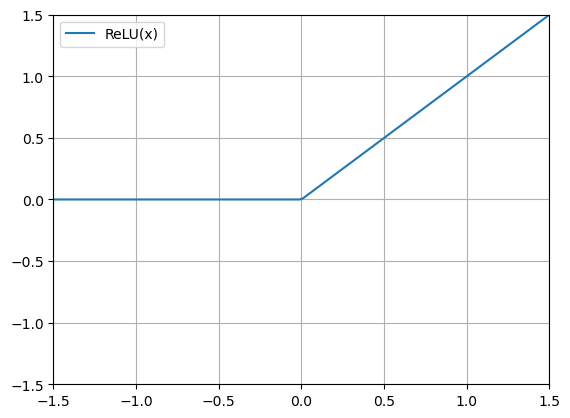

In [149]:
Plot(x, relu(x), 'ReLU(x)')

### Derivative

$ReLU'(z) = \begin{cases} 0, z < 0\\ 1, z > 0  \end{cases}$

In [157]:
def relu_derivative(x: np.ndarray):
    return (x >= 0).astype(np.float64)

In [158]:
%%timeit -r 4
relu_derivative(X)

4.46 µs ± 190 ns per loop (mean ± std. dev. of 4 runs, 100,000 loops each)


In [159]:
relu_derivative(X)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

### Graph

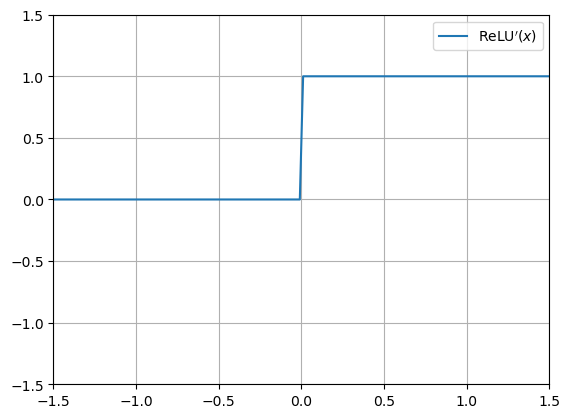

In [160]:
Plot(x, relu_derivative(x), "ReLU$'(x)$")

## ReLU6

$ReLU6(x) = min(max(0, x), 6)$

In [161]:
def relu6(z: np.ndarray):
    return np.minimum(np.maximum(0, z), 6)

In [162]:
%%timeit -r 4
relu6(X)

3.96 µs ± 66.7 ns per loop (mean ± std. dev. of 4 runs, 100,000 loops each)


In [163]:
relu6(X)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 3, 4, 5, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [6, 6, 6, 6, 6, 6, 6, 6]])

### Graph

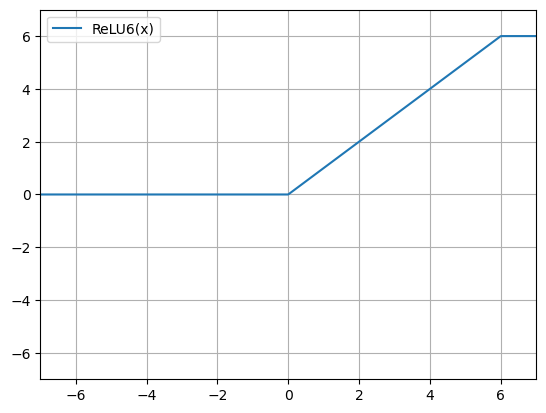

In [168]:
Plot(x, relu6(x), "ReLU6(x)", xlim=[-7, 7], ylim=[-7, 7])

## Derivative

In [165]:
def relu6_derivative(x: np.ndarray):
    return ((x >= 0) & (x <= 6)).astype(np.float64)

In [166]:
%%timeit -r 4
relu6_derivative(X)

7.35 µs ± 110 ns per loop (mean ± std. dev. of 4 runs, 100,000 loops each)


In [167]:
relu6_derivative(X)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

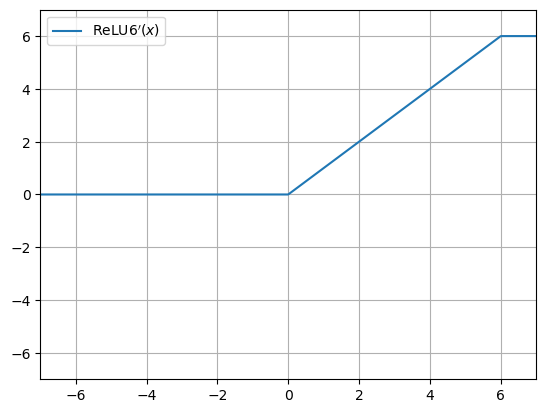

In [169]:
Plot(x, relu6(x), "ReLU6$'(x)$", xlim=[-7, 7], ylim=[-7, 7])